# CREDIT CARD CASE STUDY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dte
import seaborn as sns
import re


In [2]:
# set the graphs to show in the jupyter notebook
%matplotlib inline

In [3]:
# set seabor graphs to a better style
sns.set(style="ticks")

In [4]:
Customer_Acq=pd.read_csv('C:/Users/DELL/Downloads/Basic Data Manipulation - Visualization Exercise/Case Study 2 - Credit Card Case Study/Customer Acqusition.csv')


In [5]:
spend=pd.read_csv('C:/Users/DELL/Downloads/Basic Data Manipulation - Visualization Exercise/Case Study 2 - Credit Card Case Study/spend.csv')


In [6]:
repayment=pd.read_csv('C:/Users/DELL/Downloads/Basic Data Manipulation - Visualization Exercise/Case Study 2 - Credit Card Case Study/Repayment.csv')
repayment.rename({'Amount':'repay_amount'},inplace=True)


In [7]:
Customer_Acq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   No        100 non-null    int64  
 1   Customer  100 non-null    object 
 2   Age       100 non-null    int64  
 3   City      100 non-null    object 
 4   Product   100 non-null    object 
 5   Limit     100 non-null    float64
 6   Company   100 non-null    object 
 7   Segment   100 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB


In [8]:
# Renaming the columns
spend.rename(columns={'Amount':'spend_amount'}, inplace=True)
repayment.rename(columns={'Amount':'repay_amount'}, inplace=True)

In [9]:
# merging of spend with customer_acq and replayment with customer_acq
spend_data=spend.merge(right=Customer_Acq,how='inner', right_on='Customer',left_on='Customer')
repayment_data=repayment.merge(right=Customer_Acq,how='inner', right_on='Customer',left_on='Customer')

In [10]:
# droping extra columns
spend_data.drop(['Sl No:','No'], axis=1, inplace=True)
repayment_data.drop(['SL No:','No','Unnamed: 4'], axis=1, inplace=True)


In [11]:
# datatype_conversion
spend_data['Month']=spend_data['Month'].apply(lambda x:pd.to_datetime(x))
repayment_data['Month']=repayment_data['Month'].apply(lambda x:pd.to_datetime(x))

In [12]:

spend_data.rename(columns={'Month':'spend_date'}, inplace=True)
repayment_data.rename(columns={'Month':'repay_date'}, inplace=True)

In [13]:
#extract datepart-month
spend_data['spend_year']=spend_data['spend_date'].dt.year
spend_data['spend_month']=spend_data['spend_date'].dt.month
repayment_data['repay_year']=repayment_data['repay_date'].dt.year
repayment_data['repay_month']=repayment_data['repay_date'].dt.month

#### Following are some of Mr. Watson’s questions to a Consultant (like you) to understand the
#### customers spend & repayment behavior.

### 1a. In case age is less than 18, replace it with mean of age values

In [14]:
# replacing age below 18 with mean of age values

mean_age1=spend_data['Age'].mean()
mean_age2=repayment_data['Age'].mean()
spend_data['Age'].loc[spend_data['Age']<18]=mean_age1
repayment_data['Age'].loc[repayment_data['Age']<18]=mean_age2

C:\Users\DELL\AppData\Local\Temp\ipykernel_9172\2474105758.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spend_data['Age'].loc[spend_data['Age']<18]=mean_age1
C:\Users\DELL\AppData\Local\Temp\ipykernel_9172\2474105758.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repayment_data['Age'].loc[repayment_data['Age']<18]=mean_age2


###  1b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.


In [15]:
# Replacing more spend amount with 50% of that customer’s limit

spend_data['spend_amount']=np.where(spend_data['spend_amount']>spend_data['Limit'],spend_data['Limit']*0.50,spend_data['spend_amount'])


###  1c.  Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [16]:
# Replacing more repayment amount with that customer’s limit

repayment_data['repay_amount']=np.where(repayment_data['repay_amount']>repayment_data['Limit'],repayment_data['Limit'],repayment_data['repay_amount'])


### 2a. From the above dataset create the following summaries:      How many distinct customers exist


In [17]:
# distinct customers
print(f'total unique customers in repayment_data are : {repayment_data.Customer.nunique()}')
print(f'total unique customers in spend_data are     : {spend_data.Customer.nunique()}')

total unique customers in repayment_data are : 100
total unique customers in spend_data are     : 100


### 2b. How many distinct categories exist?

In [18]:
print(f'total distinct categories in repayment_data are : {repayment_data.Product.nunique()}')
print(f'total distinct categories in spend_data are     : {spend_data.Product.nunique()}')

total distinct categories in repayment_data are : 3
total distinct categories in spend_data are     : 3


### 2c. What is the average monthly spend by customers?

In [19]:
print('average monthly spend by customers')
average_monthly_spend=spend_data.pivot_table(index=['Customer','spend_month'],values='spend_amount', aggfunc='mean').reset_index()
average_monthly_spend

average monthly spend by customers


,Customer,spend_month,spend_amount
0,A1,1,372762.587143
1,A1,2,175235.690000
2,A1,4,261649.250000
3,A1,5,361141.310000
4,A1,8,344372.100000
...,...,...,...
573,A95,1,240401.500000
574,A96,1,54729.660000
575,A97,1,5000.000000
576,A98,1,5000.500000


### 2d. What is the average monthly repayment by customers?

In [20]:
print('average monthly repayment by customers')
average_monthly_repayment=repayment_data.pivot_table(index=['Customer','repay_month'],values='repay_amount', aggfunc='mean').reset_index()
average_monthly_repayment

average monthly repayment by customers


,Customer,repay_month,repay_amount
0,A1,1,343972.327143
1,A1,2,156374.760000
2,A1,4,254474.580000
3,A1,7,297176.740000
4,A1,9,186427.500000
...,...,...,...
553,A95,1,369405.960000
554,A96,1,100000.000000
555,A97,1,10000.000000
556,A98,1,10001.000000


### 2e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?

#####  (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment– Monthly spend. 
#####  Interest is earned only on positive profits and not on negative amounts)

In [21]:
# Merge monthly infromation from spend_data and repayment_data 

Monthly_info=average_monthly_spend.merge(right=average_monthly_repayment,how='inner', left_on=['Customer','spend_month'], right_on=['Customer','repay_month'])


In [22]:
# Monthly profit for bank per customer at interest rate 2.9%
Monthly_info['monthly_profit']=Monthly_info['repay_amount']-Monthly_info['spend_amount']
Monthly_info['actual_profit']=np.where(Monthly_info['monthly_profit']>0.0,Monthly_info['monthly_profit']*0.029,np.nan)

In [23]:
# monthwise total profit for  the bank
Monthly_info.groupby(['spend_month','repay_month'])['actual_profit'].agg(sum).reset_index()

,spend_month,repay_month,actual_profit
0,1,1,72943.526885
1,2,2,94212.942438
2,3,3,62443.081408
3,4,4,88573.632393
4,5,5,62732.066471
5,6,6,8530.659527
6,7,7,34100.906425
7,8,8,28955.409117
8,9,9,31579.855273
9,10,10,21708.899750


### 2f. What are the top 5 product types?

In [24]:
print('Top 5 product types are ')
spend_data.groupby('Type')['spend_amount'].agg('sum').reset_index().sort_values(by='spend_amount',ascending=False).head(5)



Top 5 product types are 


,Type,spend_amount
10,PETRO,28597384.98
4,CAMERA,27690738.44
7,FOOD,20519243.60
0,AIR TICKET,20155847.12
14,TRAIN TICKET,19995825.72


### 2g. Which city is having maximum spend?

In [25]:
print('City with maximum spend amount is:')
spend_data.groupby('City')['spend_amount'].agg('sum').reset_index().sort_values(by='spend_amount', ascending=False).reset_index(drop=True).head(1)

City with maximum spend amount is:


,City,spend_amount
0,COCHIN,45963513.5


### 2h. Which age group is spending more money?

In [26]:
print('customers with age 28yrs are spending more amount:')
spend_data.groupby('Age')['spend_amount'].agg('sum').reset_index().sort_values(by='spend_amount', ascending=False).reset_index(drop=True).head(1)

customers with age 28yrs are spending more amount:


,Age,spend_amount
0,28.0,17365270.23


### 2i. Who are the top 10 customers in terms of repayment?

In [27]:
print('top 10 customers in terms of repayment are:')
repayment_data.groupby('Customer')['repay_amount'].agg('sum').reset_index().sort_values(by='repay_amount').reset_index(drop=True).head(10)

top 10 customers in terms of repayment are:


,Customer,repay_amount
0,A77,3159.62
1,A97,10000.00
2,A98,10001.00
3,A99,10002.00
4,A83,10002.00
5,A69,20000.00
6,A70,20002.00
7,A71,20004.00
8,A78,55344.81
9,A100,69551.19


### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for  the same.

In [28]:
print('City with maximum spend amount is:')

spend_city_wise=pd.pivot_table(data = spend_data, index = 'City', columns=['Product','spend_year'],values='spend_amount', aggfunc='sum')

spend_city_wise

City with maximum spend amount is:


Product           Gold                              Platimum              \
spend_year        2004         2005         2006        2004        2005   
City                                                                       
BANGALORE   9289878.54  12892362.99  12030611.09  1112732.30   912284.97   
BOMBAY      6987853.53   8983018.28   7917144.31   897264.94   711804.94   
CALCUTTA    7477140.98  10303355.80  11167532.77  2037690.30  4434696.31   
CHENNAI     1059618.50   3740945.58   2704288.62  3535652.38  5053956.32   
COCHIN      7315850.15  12110613.03  10499142.38  3419904.07  4960921.71   
DELHI       2806495.00   1964845.27   2957103.32   283512.89   494157.86   
PATNA       2072567.90   3252615.77   2276181.69  1113069.60  2883231.07   
TRIVANDRUM  2415102.84   1240375.85   2735710.87  2161676.67  3601443.30   

Product                     Silver                         
spend_year        2006        2004       2005        2006  
City                                                       
BANGALORE    685831.27  1291852.58  830612.34  1415480.94  
BOMBAY       972130.01   532089.03  508988.54  1092833.80  
CALCUTTA    3589606.66   500006.00  440147.06  1157956.42  
CHENNAI     5024923.40   282056.86  377184.49   350009.50  
COCHIN      4920592.29   814229.62  652269.38  1269990.87  
DELHI        176788.72   768172.30  612311.21   854899.97  
PATNA       1256137.65   756684.10  950094.19   700005.00  
TRIVANDRUM  2147403.75   209667.48  269912.99   555862.12

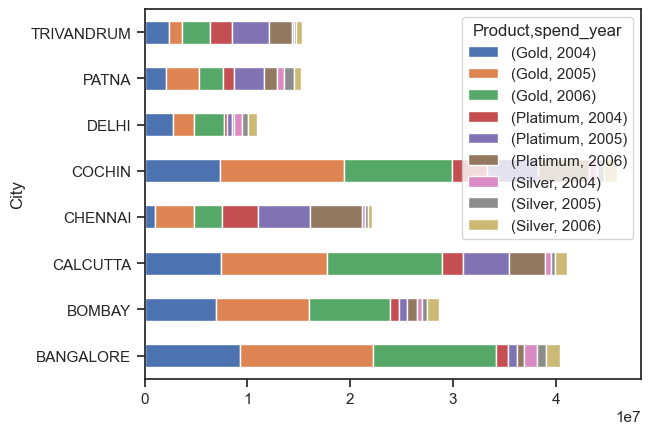

In [29]:
spend_city_wise.plot(kind='barh',stacked=True)

plt.show()

## 4. Create graphs


### 4a. Monthly comparison of total spends, city wise


In [30]:
Monthly_comparison=spend_data.pivot_table(index='City', columns='spend_month',values='spend_amount',aggfunc='sum')

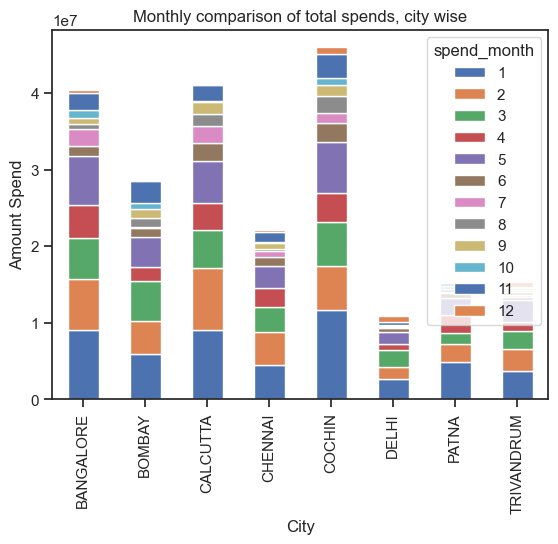

In [31]:
Monthly_comparison.plot(kind='bar', stacked=True)
plt.title('Monthly comparison of total spends, city wise')
plt.xlabel('City')
plt.ylabel('Amount Spend')
plt.show()

### 4b. Comparison of yearly spend on air tickets

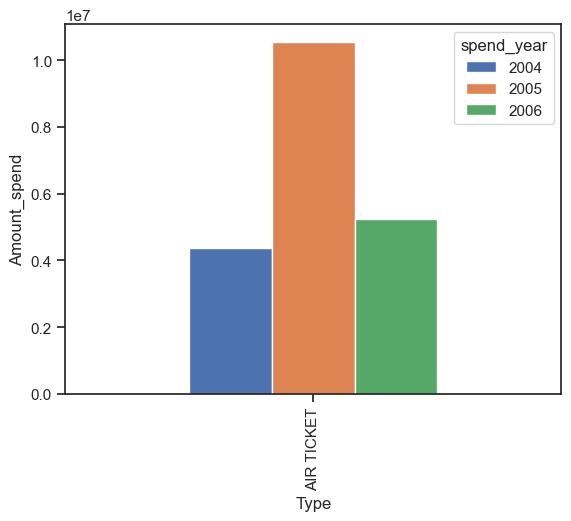

In [32]:
air_ticket_data=pd.pivot_table(data = spend_data[spend_data.Type=='AIR TICKET'],index ='Type',columns='spend_year',values='spend_amount', aggfunc='sum')
air_ticket_data.plot(kind='bar')
plt.ylabel('Amount_spend')
plt.show()

### 4c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

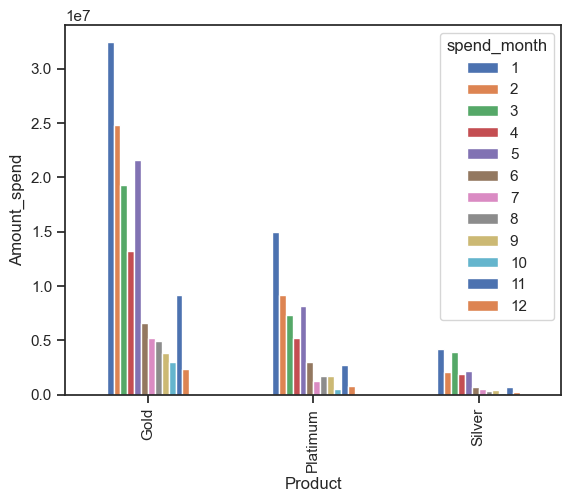

In [33]:
product_monthly_spend=spend_data.pivot_table(index='Product', columns='spend_month',values='spend_amount',aggfunc='sum')
product_monthly_spend.plot(kind='bar')
plt.ylabel('Amount_spend')
plt.show()

Observations from above chart (Comparison of monthly spend for each product):
1. More spend is on Gold, then platinum and then silver.
2. maximum spend occures during first 5 months
3. After 5 month there is a significant decreament in the spend.
4. There is a significant increament in spend in 11th month and then is again decrease and go to minimum.


### 5. Write user defined PYTHON function to perform the following analysis:
#### You need to find top 10 customers for each city in terms of their repayment amount by
#### different products and by different time periods i.e. year or month. The user should be able
#### to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the
#### function should automatically take these inputs while identifying the top 10 customers

In [34]:
def top_customers(prod_cat,time_period):
    filtered_data=repayment_data.loc[(repayment_data.Product == prod_cat)]
    result1=filtered_data.groupby(['Customer','City','Product',time_period]).agg({'repay_amount':'sum'})
    result2=result1.reset_index().sort_values('repay_amount',ascending=False).head(10)
    return result2

In [35]:
prod_cat=str(input('Choose the product name from these options: (Gold/Silver/Platinum)   '))
time_period=str(input('Choose time period from these options: (repay_year/repay_month)   '))
top_customers(prod_cat,time_period)

Choose the product name from these options: (Gold/Silver/Platinum)   Gold
Choose time period from these options: (repay_year/repay_month)   repay_month


,Customer,City,Product,repay_month,repay_amount
176,A61,COCHIN,Gold,4,3412860.60
132,A42,BOMBAY,Gold,5,3305341.39
113,A30,BANGALORE,Gold,5,3086549.14
107,A29,CALCUTTA,Gold,5,2612139.63
128,A42,BOMBAY,Gold,1,2516249.24
163,A60,CALCUTTA,Gold,1,2465584.81
145,A44,DELHI,Gold,1,2415712.91
0,A1,BANGALORE,Gold,1,2407806.29
166,A60,CALCUTTA,Gold,4,2397565.91
100,A28,TRIVANDRUM,Gold,5,2233253.41
